In [35]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore

In [24]:
data = pd.read_csv('February 19.csv')

#dropping the column POS Offline because it's zero everywhere

data = data.drop('POS Offline', axis=1)

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66 entries, 0 to 65
Data columns (total 14 columns):
Bank Name                                            66 non-null object
ATMs Onsite                                          66 non-null int64
ATMs Offsite                                         66 non-null int64
POS Online                                           66 non-null int64
Credits cards outstanding at the end of the month    66 non-null int64
CC No. of transactions ATM                           66 non-null int64
CC No. of transactions POS                           66 non-null int64
CC Amount of transactions ATM                        66 non-null int64
CC Amount of transactions POS                        66 non-null int64
Debits cards outstanding at the end of the month     66 non-null int64
DC No. of transactions ATM                           66 non-null int64
DC No. of transactions POS                           66 non-null int64
DC Amount of transactions ATM               

In [26]:
data.describe()

,ATMs Onsite,ATMs Offsite,POS Online,Credits cards outstanding at the end of the month,CC No. of transactions ATM,CC No. of transactions POS,CC Amount of transactions ATM,CC Amount of transactions POS,Debits cards outstanding at the end of the month,DC No. of transactions ATM,DC No. of transactions POS,DC Amount of transactions ATM,DC Amount of transactions POS
count,66.000000,66.000000,66.000000,6.600000e+01,66.000000,6.600000e+01,66.000000,66.000000,6.600000e+01,6.600000e+01,6.600000e+01,66.000000,66.000000
mean,1614.575758,1458.787879,55103.803030,6.979035e+05,12009.075758,2.141457e+06,55.833333,7346.545455,1.431130e+07,1.239265e+07,5.249723e+06,39307.318182,6894.757576
std,3408.477680,4409.017300,144098.207071,2.081279e+06,30763.355760,6.391454e+06,151.550711,22088.645915,4.202572e+07,4.950162e+07,1.390102e+07,125612.540877,18913.669793
min,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,71.000000,2.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,5.146222e+05,5.090832e+05,1.770940e+05,1890.750000,244.500000
50%,556.000000,287.500000,5126.000000,1.600000e+02,0.000000,4.550000e+01,0.000000,0.000000,2.791090e+06,2.217950e+06,1.509638e+06,8012.000000,1843.000000
75%,2120.000000,764.750000,23120.500000,1.724742e+05,6356.000000,2.643288e+05,29.750000,752.000000,1.181670e+07,7.959812e+06,4.176074e+06,30955.000000,5267.000000
max,25560.000000,32816.000000,720721.000000,1.248992e+07,173007.000000,3.804526e+07,999.000000,134686.000000,3.260783e+08,4.012321e+08,9.883941e+07,998075.000000,133178.000000


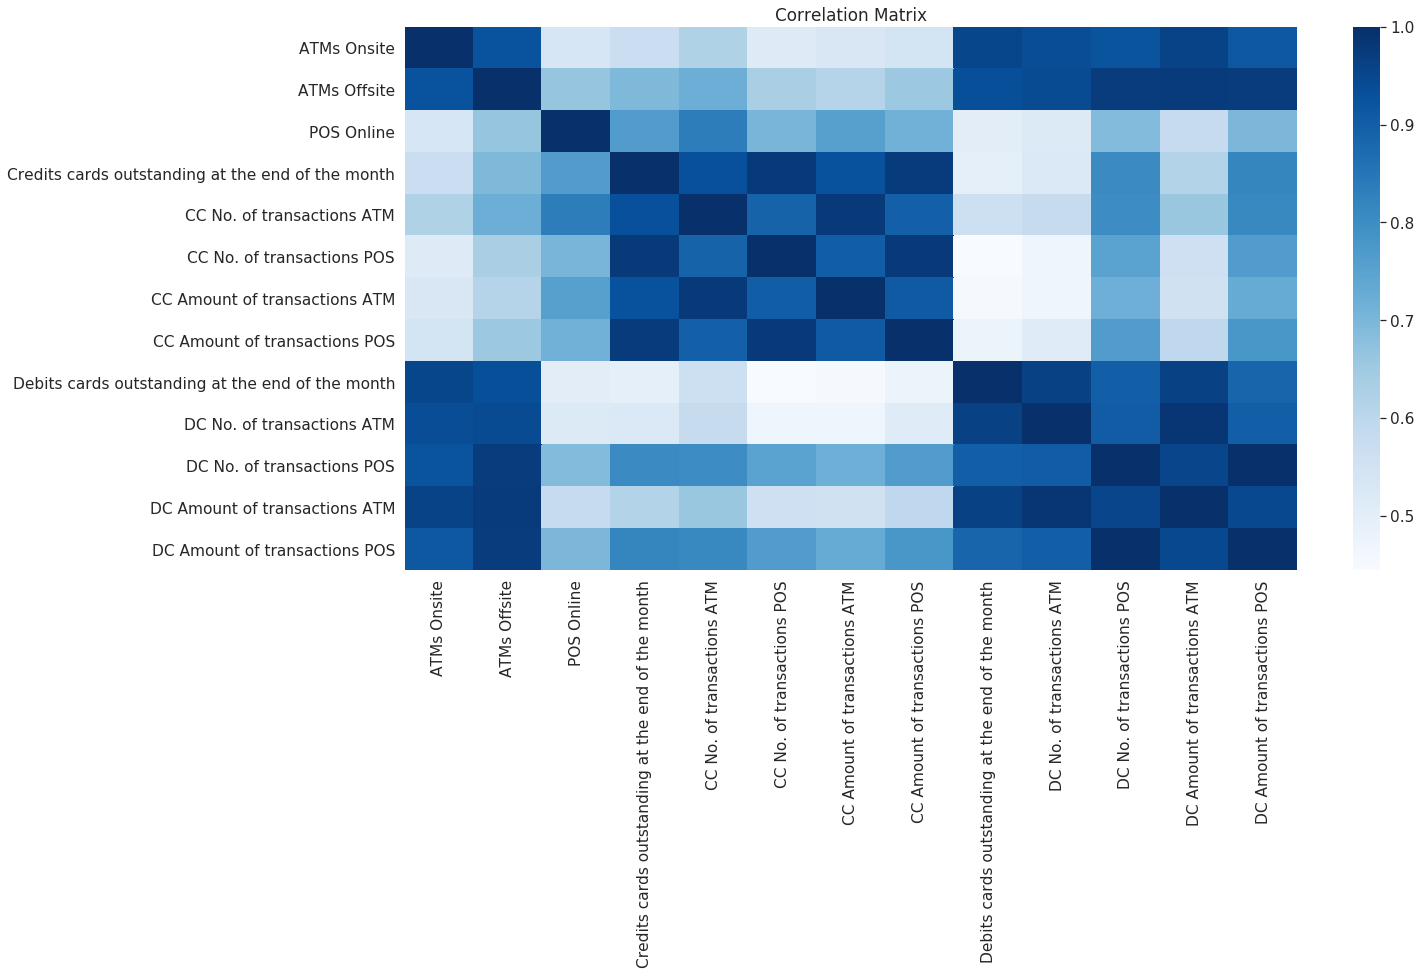

In [30]:
corr = data.corr()

plt.figure(figsize=(20, 10))

sns.set(font_scale=1.4)
cmap = sns.diverging_palette(h_neg=210, h_pos=350, s=90, l=30, as_cmap=True)
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, cmap="Blues")
plt.title("Correlation Matrix")

plt.show()

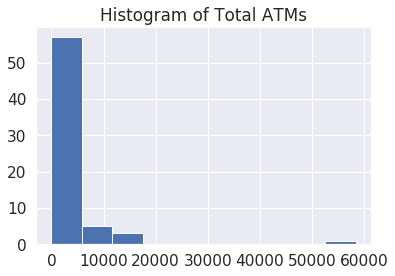

In [55]:
data["Total ATMs"] = data["ATMs Onsite"] + data["ATMs Offsite"] 

plt.hist(data["Total ATMs"])
plt.title("Histogram of Total ATMs")
plt.show()

In [34]:
print(data["Total ATMs"].mean())

print(np.percentile(data["Total ATMs"], [0, 25, 50, 75, 100]))

3073.3636363636365
[    0.     113.75  1100.    2600.25 58376.  ]


In [36]:
# Z scaling because the data in different columns varies a lot.

d_ = data.copy()
d_ = d_.drop('Bank Name', axis=1)

d_ = d_.apply(zscore)

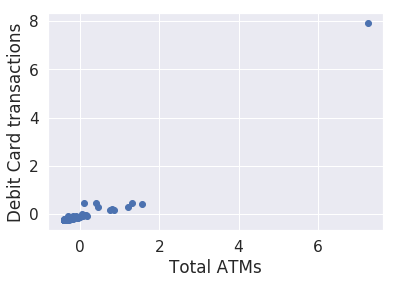

In [38]:
plt.scatter(d_['Total ATMs'], d_['DC No. of transactions ATM'])
plt.xlabel("Total ATMs")
plt.ylabel("Debit Card transactions")
plt.show()

The outlier is State Bank Of India.

Scatterplot with SBI removed

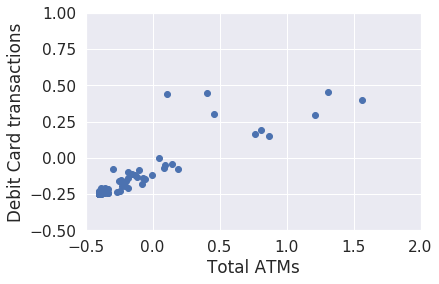

In [39]:
plt.scatter(d_['Total ATMs'], d_['DC No. of transactions ATM'])
plt.xlim(-0.5, 2)
plt.ylim(-0.5, 1)
plt.xlabel("Total ATMs")
plt.ylabel("Debit Card transactions")
plt.show()

In [41]:
# Finding the no. of transactions per atm for different banks

data['trans_per_atm'] = 0

for i in range(len(data)):

    if data['Total ATMs'][i] !=0 :
        data['trans_per_atm'][i] = data['DC No. of transactions ATM'][i] / data['Total ATMs'][i]
        
    else:
        data['trans_per_atm'][i] = 0

/home/ankita/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/ankita/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [45]:
print(data['trans_per_atm'].mean())

print(np.percentile(data['trans_per_atm'], [25, 50, 75]))

22010.257575757576
[1079.75 2281.   3685.5 ]


In [50]:
x = data[data['trans_per_atm'] > 3685]

x

#Here PayTM Payments Bank is a special case.

,Bank Name,ATMs Onsite,ATMs Offsite,POS Online,Credits cards outstanding at the end of the month,CC No. of transactions ATM,CC No. of transactions POS,CC Amount of transactions ATM,CC Amount of transactions POS,Debits cards outstanding at the end of the month,DC No. of transactions ATM,DC No. of transactions POS,DC Amount of transactions ATM,DC Amount of transactions POS,Total ATMs,trans_per_atm
0,ALLAHABAD BANK,631,200,3176,0,0,0,0,0,6049046,8736133,2893368,20881,2870,831,10512
3,BANK OF INDIA,2596,3558,64884,184049,22048,287734,122,716,59139931,34343155,8217880,63170,8315,6154,5580
9,INDIAN BANK,3135,740,10591,87102,2656,123776,15,264,18579046,34072269,6063928,60591,6508,3875,8792
16,UNION BANK OF INDIA,3831,2748,50692,46567,3612,192100,18,485,16180686,27121255,4217910,76017,5865,6579,4122
20,STATE BANK OF INDIA,25560,32816,579508,7998808,135768,22340028,522,85527,326078311,401232064,98839407,998075,133178,58376,6873
22,BANDHAN BANK LTD,481,0,26045,0,0,0,0,0,2789018,1939588,795328,7188,1107,481,4032
27,FEDERAL BANK LTD,1179,489,9716,0,0,0,0,0,5480333,7455366,4050566,36918,5309,1668,4469
30,IDFC Bank Limited,107,6,1789,0,0,0,0,0,1429815,2113952,1251968,7225,1128,113,18707
32,JAMMU AND KASHMIR BANK,728,557,17070,137750,8186,194113,27,764,3767846,5036588,828070,23544,2195,1285,3919
38,TAMILNAD MERCANTILE BANK LTD,472,680,4663,18253,2386,41790,10,155,1352578,4474609,489313,18269,705,1152,3884


In [51]:
y = data[data['Total ATMs'] > 2600]

y

#This results in all the major banks of India.

,Bank Name,ATMs Onsite,ATMs Offsite,POS Online,Credits cards outstanding at the end of the month,CC No. of transactions ATM,CC No. of transactions POS,CC Amount of transactions ATM,CC Amount of transactions POS,Debits cards outstanding at the end of the month,DC No. of transactions ATM,DC No. of transactions POS,DC Amount of transactions ATM,DC Amount of transactions POS,Total ATMs,trans_per_atm
1,ANDHRA BANK,3025,773,15895,297282,14808,523048,74,1288,28048189,9846798,5858733,32749,7162,3798,2592
2,BANK OF BARODA,6430,3247,51960,216885,8515,526791,32,1156,59918420,19719888,10904078,84197,12860,9677,2037
3,BANK OF INDIA,2596,3558,64884,184049,22048,287734,122,716,59139931,34343155,8217880,63170,8315,6154,5580
5,CANARA BANK,4769,4107,20800,356237,42990,588560,222,1196,36820396,20462769,10170485,86751,12766,8876,2305
6,CENTRAL BANK OF INDIA,3081,1086,3379,93220,2187,142782,9,313,18976200,10239076,5238091,41314,6080,4167,2457
7,CORPORATION BANK,2359,658,161588,110149,1826,135947,8,323,13024108,6659907,3533072,27109,4114,3017,2207
9,INDIAN BANK,3135,740,10591,87102,2656,123776,15,264,18579046,34072269,6063928,60591,6508,3875,8792
10,INDIAN OVERSEAS BANK,2946,511,19750,57753,851,82894,3,162,16279422,12500117,4249000,51104,5590,3457,3615
11,ORIENTAL BANK OF COMMERCE,2342,283,8408,0,0,0,0,0,11067454,5097189,3172071,22382,3702,2625,1941
13,PUNJAB NATIONAL BANK,5332,3919,63465,333089,7410,558175,33,1180,72673656,21710308,11828088,97235,15911,9251,2346


In [52]:
y['trans_per_atm'].mean()

3307.4117647058824